In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("food_orders_new_delhi.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [4]:
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [5]:
data.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


Check for duplicate rows

In [6]:
duplicate_rows = data.duplicated().sum()
print("No.of duplicate rows:{}".format(duplicate_rows))

No.of duplicate rows:0


# Handling missing values

In [7]:
data.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [8]:
data['Discounts and Offers'].fillna('NaN',inplace =True)

In [9]:
data.isnull().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

# Identify Outliers

In [10]:
numerical_columns = ['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks']

In [11]:
def find_outliers_zscore(series, threshold=3):
    z_scores = np.abs((series - series.mean()) / series.std())
    return series[z_scores > threshold]

for col in numerical_columns:
    outliers = find_outliers_zscore(data[col])
    print(f"Outliers in {col} using Z-score:")
    print(outliers)

Outliers in Order Value using Z-score:
Series([], Name: Order Value, dtype: int64)
Outliers in Delivery Fee using Z-score:
Series([], Name: Delivery Fee, dtype: int64)
Outliers in Commission Fee using Z-score:
Series([], Name: Commission Fee, dtype: int64)
Outliers in Payment Processing Fee using Z-score:
Series([], Name: Payment Processing Fee, dtype: int64)
Outliers in Refunds/Chargebacks using Z-score:
Series([], Name: Refunds/Chargebacks, dtype: int64)


In [12]:
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

for col in numerical_columns:
    outliers = find_outliers_iqr(data[col])
    print(f"Outliers in {col} using IQR:")
    print(outliers)


Outliers in Order Value using IQR:
Series([], Name: Order Value, dtype: int64)
Outliers in Delivery Fee using IQR:
Series([], Name: Delivery Fee, dtype: int64)
Outliers in Commission Fee using IQR:
Series([], Name: Commission Fee, dtype: int64)
Outliers in Payment Processing Fee using IQR:
Series([], Name: Payment Processing Fee, dtype: int64)
Outliers in Refunds/Chargebacks using IQR:
5      150
40     150
46     150
63     150
75     150
      ... 
949    150
953    150
961    150
972    150
985    150
Name: Refunds/Chargebacks, Length: 88, dtype: int64


In [13]:
def cap_outliers(series):
    lower_cap = series.quantile(0.01)
    upper_cap = series.quantile(0.99)
    return series.clip(lower_cap, upper_cap)

# Applying capping to all numerical columns
for col in numerical_columns:
    data[col] = cap_outliers(data[col])

In [14]:
from datetime import datetime
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])

# Handling Categorical Data

In [15]:
data = pd.get_dummies(data,columns=['Payment Method'],drop_first= True)

In [16]:
def extract_discount(discount_str):
    if 'off' in discount_str:
        # fixed amount off
        try:
            return float(discount_str.split(' ')[0]), 'fixed'
        except ValueError:
            return 0.0, 'none'
    elif '%' in discount_str:
        # percentage off
        try:
            return float(discount_str.split('%')[0]), 'percentage'
        except ValueError:
            return 0.0, 'none'
    else:
        # no discount
        return 0.0, 'none'

# apply the function to create new 'Discount Percentage' and 'Discount Type' columns
data['Discount Value'], data['Discount Type'] = zip(*data['Discounts and Offers'].apply(extract_discount))

# calculate the discount amount based on the order value and discount type
def calculate_discount_amount(row):
    if row['Discount Type'] == 'percentage':
        return row['Order Value'] * row['Discount Value'] / 100
    elif row['Discount Type'] == 'fixed':
        return row['Discount Value']
    else:
        return 0.0

data['Discount Amount'] = data.apply(calculate_discount_amount, axis=1)
print(data.head())

   Order ID Customer ID Restaurant ID Order Date and Time  \
0         1       C8270         R2924 2024-02-01 01:11:52   
1         2       C1860         R2054 2024-02-02 22:11:04   
2         3       C6390         R2870 2024-01-31 05:54:35   
3         4       C6191         R2642 2024-01-16 22:52:49   
4         5       C6734         R2799 2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee Discounts and Offers  \
0    2024-02-01 02:39:52         1914             0            5% on App   
1    2024-02-02 22:46:04          986            40                  10%   
2    2024-01-31 06:52:35          937            30         15% New User   
3    2024-01-16 23:38:49         1463            50                  NaN   
4    2024-01-29 02:48:30         1974            30         50 off Promo   

   Commission Fee  Payment Processing Fee  Refunds/Chargebacks  \
0           150.0                      47                    0   
1           198.0                      23   

# Cost and Profitability Analysis

In [17]:
# calculate total costs and revenue per order
data['Total Costs'] = data['Delivery Fee'] + data['Payment Processing Fee'] + data['Discount Amount']
data['Revenue'] = data['Commission Fee']
data['Profit'] = data['Revenue'] - data['Total Costs']

# aggregate data to get overall metrics
total_orders = data.shape[0]
total_revenue = data['Revenue'].sum()
total_costs = data['Total Costs'].sum()
total_profit = data['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126980.1, 'Total Costs': 132743.7, 'Total Profit': -5763.599999999999}


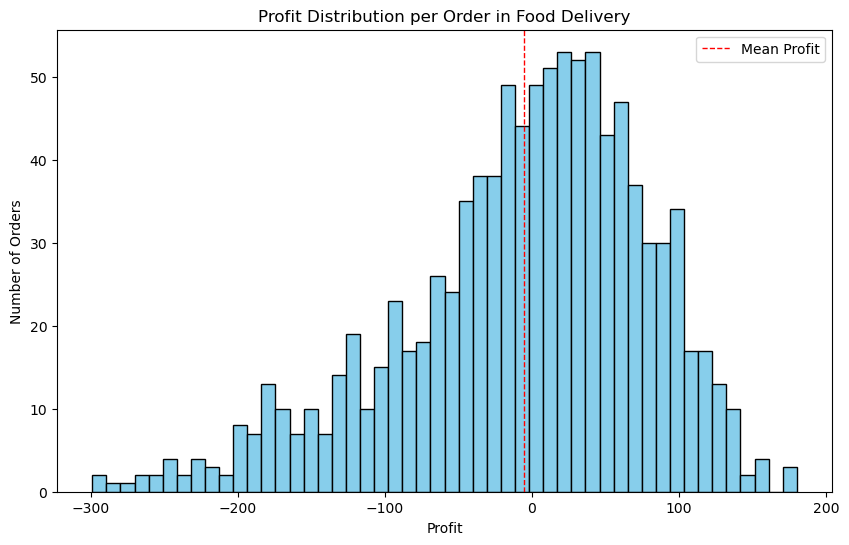

In [18]:
# Create a histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(data['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(data['Profit'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Profit')
plt.legend()
plt.show()

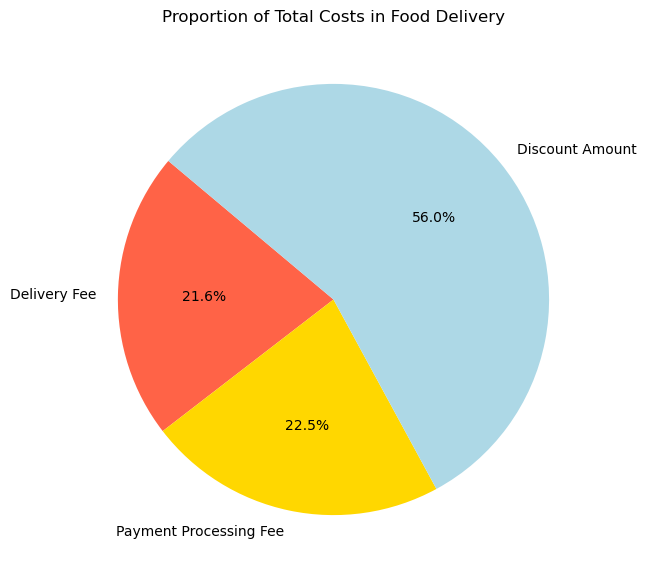

In [19]:
# Sum up the different cost components
costs_breakdown = data[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

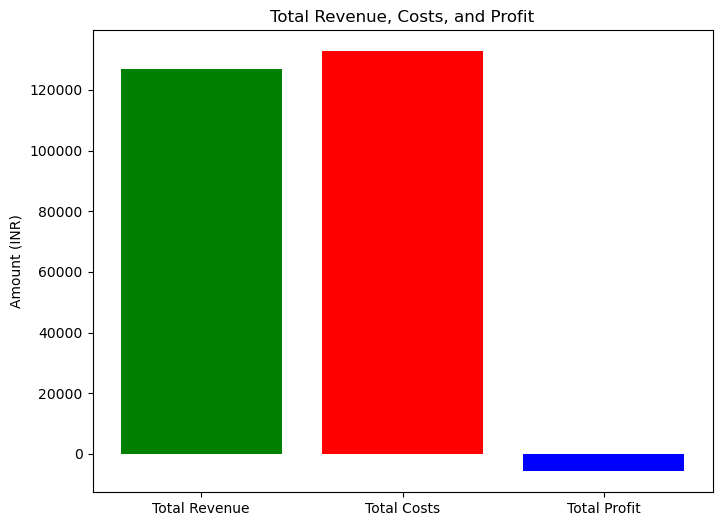

In [20]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [21]:
# Filter the dataset for profitable orders
profitable_orders = data[data['Profit'] > 0].copy()

# Calculate the commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# Calculate the discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# Calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(f"New Average Commission Percentage: {new_avg_commission_percentage:.2f}%")
print(f"New Average Discount Percentage: {new_avg_discount_percentage:.2f}%")

New Average Commission Percentage: 27.52%
New Average Discount Percentage: 5.61%


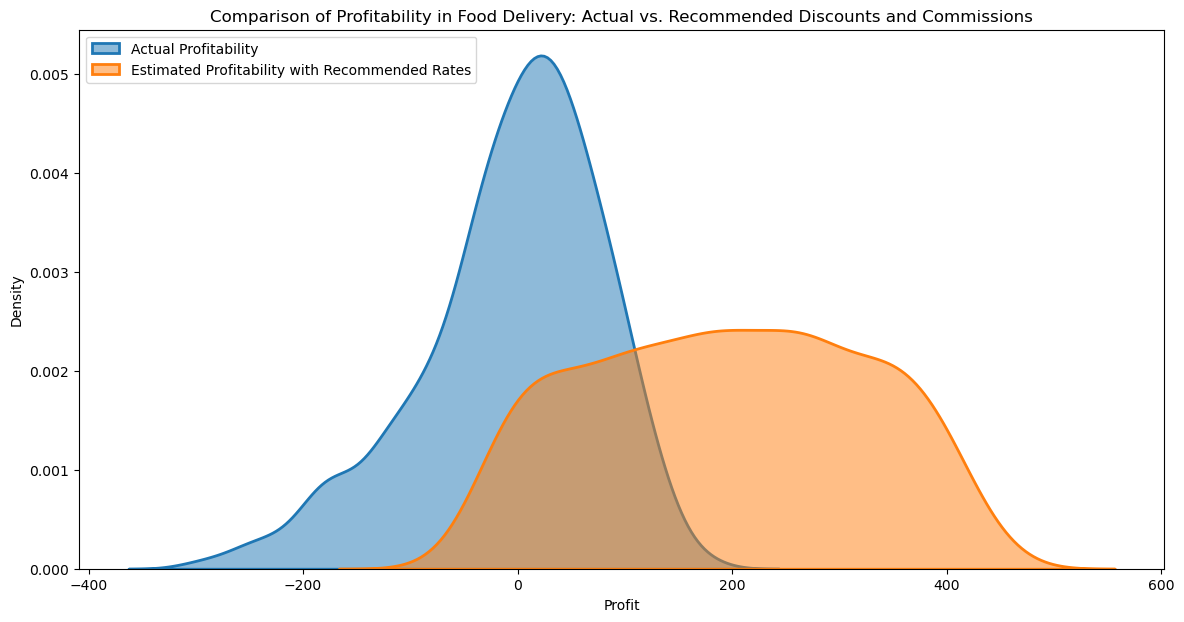

In [22]:
# Recommended commission and discount percentages
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0     # 6%

# Calculate the simulated commission fee and discount amount using recommended percentages
data['Simulated Commission Fee'] = data['Order Value'] * (recommended_commission_percentage / 100)
data['Simulated Discount Amount'] = data['Order Value'] * (recommended_discount_percentage / 100)

# Recalculate total costs and profit with simulated values
data['Simulated Total Costs'] = (data['Delivery Fee'] +
                                        data['Payment Processing Fee'] +
                                        data['Simulated Discount Amount'])

data['Simulated Profit'] = (data['Simulated Commission Fee'] -
                                   data['Simulated Total Costs'])

# Visualizing the comparison
plt.figure(figsize=(14, 7))

# Actual profitability
sns.kdeplot(data['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# Simulated profitability
sns.kdeplot(data['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()